In [1]:
from cobaya.yaml import yaml_load_file
import getdist.plots as gdplt
from cobaya import load_samples
%matplotlib inline 

In [5]:

cmb1 = load_samples('/home/fverdian/cobaya/chains/planck_cosmopower/planck', to_getdist=True)
print([pn.name for pn in cmb1.paramNames.names])
cmb1.label='cosmopower'
cmb2 = load_samples('/home/fverdian/cobaya/chains/planck_camb/planck', to_getdist=True)
cmb2.label='camb'

['logA', 'ns', 'h', 'ombh2', 'omch2', 'tau', 'A_planck', 'chi2__CMB', 'minuslogprior', 'minuslogprior__0', 'chi2', 'chi2__planck_2018_lowl.TT', 'chi2__planck_2018_lowl.EE', 'chi2__planck_2018_highl_plik.TTTEEE_lite_native']


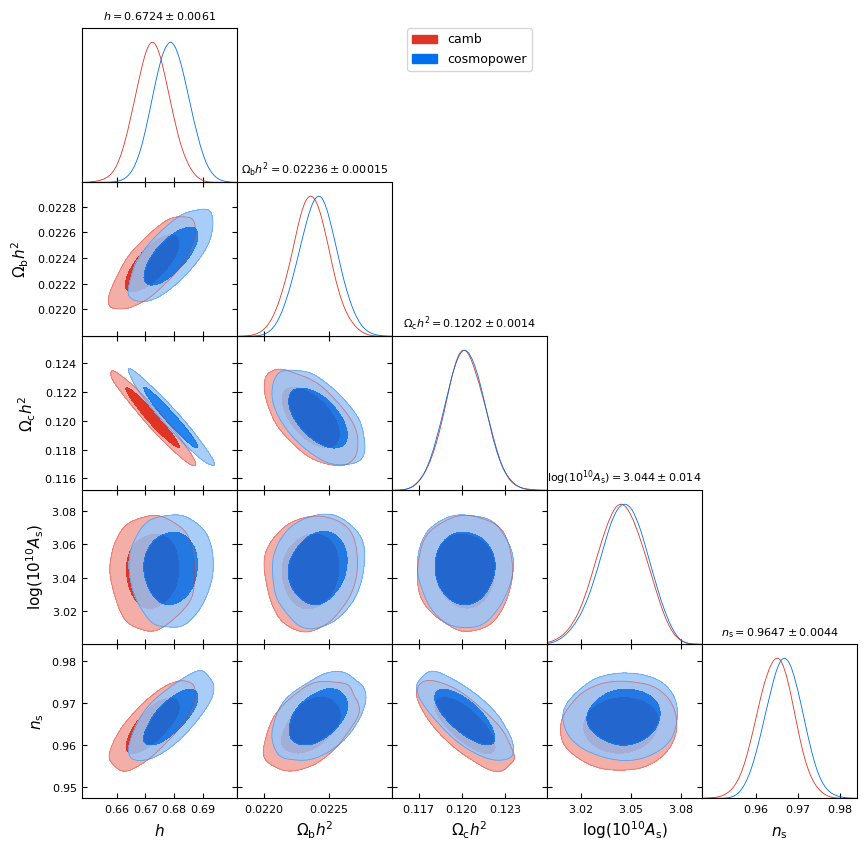

In [6]:
%matplotlib inline 
pars_toplot = ['h','ombh2','omch2','logA', 'ns']
gdplot = gdplt.get_subplot_plotter()
gdplot.triangle_plot([cmb2, cmb1], pars_toplot, filled=True, title_limit=1)


['h', 'omega_cdm', 'logA', 'n_s', 'b1_ngc_z1', 'b1_sgc_z1', 'b1_ngc_z3', 'b1_sgc_z3', 'omega_b', 'A_s', 'chi2', 'chi2__pbjboss']


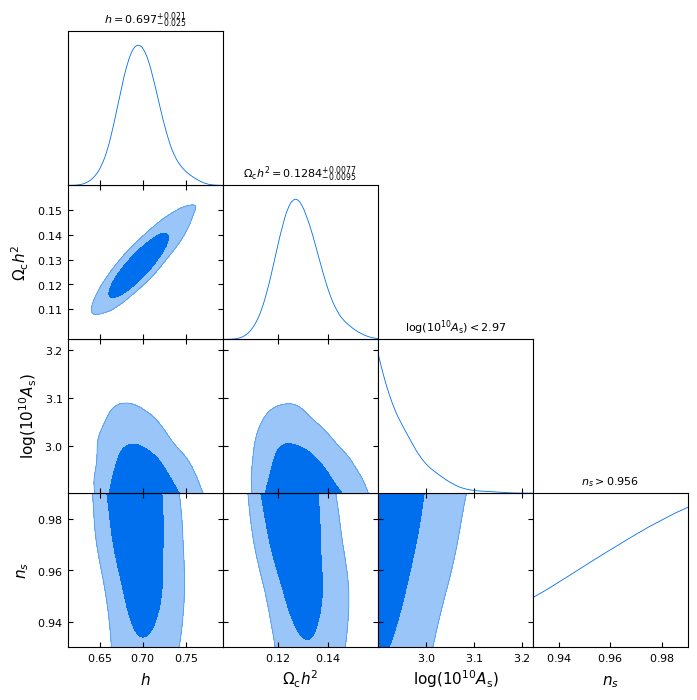

In [12]:
boss = load_samples('/home/fverdian/cobaya/chains/pbjboss/boss', to_getdist=True)
boss.label='boss'
print([pn.name for pn in boss.paramNames.names])

pars_toplot = ['h', 'omega_cdm', 'logA', 'n_s']
gdplot = gdplt.get_subplot_plotter()
gdplot.triangle_plot(boss, pars_toplot, filled=True, title_limit=1)


In [9]:
0.0220684/0.68/0.68

0.04772577854671279